In [ ]:
#importing libraries
import tensorflow as tf
print(f"Version : {tf.__version__}")

Version : 2.12.0


In [ ]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(f"Shapes -> Train Features : {X_train.shape} | Train Labels : {y_train.shape}")
print(f"Shapes -> Test Features : {X_test.shape} | Test Labels : {y_test.shape}")

Shapes -> Train Features : (60000, 28, 28) | Train Labels : (60000,)
Shapes -> Test Features : (10000, 28, 28) | Test Labels : (10000,)


### 1.1 : Visualizing the Data

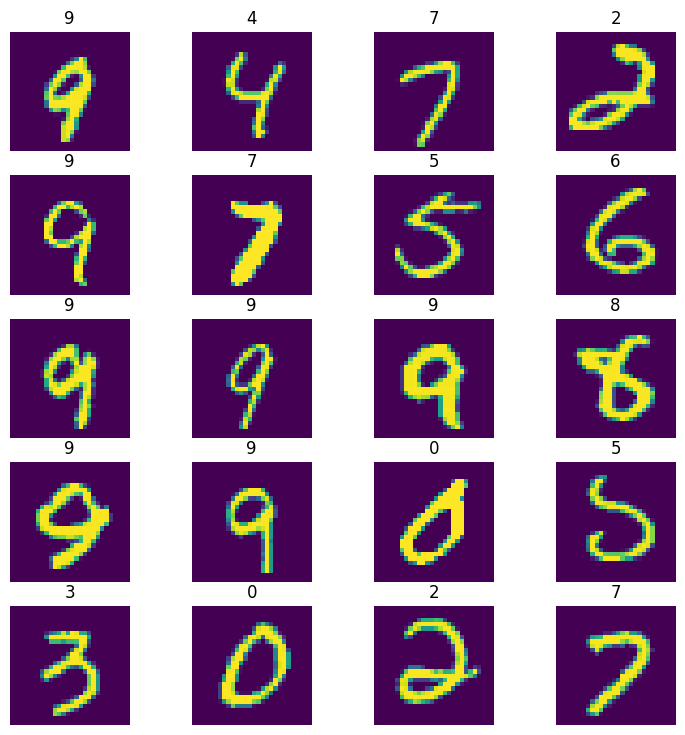

In [ ]:
import matplotlib.pyplot as plt
import random

random.seed(42)
fig = plt.figure(figsize=(9, 9))

rows, cols = 5, 4
for i in range(1, rows * cols + 1) :
  random_idx = random.randint(0, len(X_train)-1)
  img, label = X_train[random_idx], y_train[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img)
  plt.title(label)
  plt.axis(False)



### 1.2 : Building a Model

In [ ]:
mnist_model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), #Flattens the input (Adds an extra dimension)
    tf.keras.layers.Dense(units=128, activation='relu'), #Creates a NN layer with 128 hidden units
    tf.keras.layers.Dropout(0.2), #Randomly drops 20 percent of input to prevent overfitting
    tf.keras.layers.Dense(10)
])


### 1.3 Getting Logits(Raw Outputs) from the model

In [ ]:
logits = mnist_model1(X_train[:1]).numpy()
logits

array([[ 67.17771 , 136.85895 , -32.085175, 104.440414, 113.0335  ,
        104.2011  ,  -9.124811, 233.14107 , -35.615246, 174.39941 ]],
      dtype=float32)

### 1.4 Converting Logits -> Prediction Probabilties

In [ ]:
pred_probs = tf.nn.softmax(logits).numpy()
pred_probs

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 3.081939e-26]], dtype=float32)

### 1.5 Define a Loss function, Optimizer, Set Accuracy metric and compile the model


In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], pred_probs).numpy()

2.4611502

In [ ]:
mnist_model1.compile(
    optimizer='adam',
    loss=loss_fn,
    metrics=['accuracy']
)

### 1.6 Train and Evaluate the model

In [ ]:
mnist_model1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 2.4022 - accuracy: 0.7633
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5669 - accuracy: 0.8523
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4470 - accuracy: 0.8796
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4029 - accuracy: 0.8968
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3797 - accuracy: 0.9034


In [ ]:
mnist_model1.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - loss: 0.3099 - accuracy: 0.9339 - 882ms/epoch - 3ms/step


[0.3099440038204193, 0.933899998664856]

### 1.7 Model that returns pred_probs

In [ ]:
mnist_model2 = tf.keras.Sequential([
    mnist_model1,
    tf.keras.layers.Softmax()
])


In [ ]:
n_samples = 20

def random_samples(input, output, n_samples) :
  samples = list()
  for i in range(n_samples) :
    random_idx = random.randint(0, len(input))
    samples.append([input[random_idx], output[random_idx]])
  return samples

In [ ]:
samples = random_samples(X_test, y_test, 20)
pred_classes = list()
for sample in samples:
  sample[0] = tf.expand_dims(sample[0], axis=0)
  pred_probs = mnist_model2(sample[0])
  pred_class = tf.math.argmax(pred_probs, axis=1)
  pred_classes.append(pred_class.numpy())

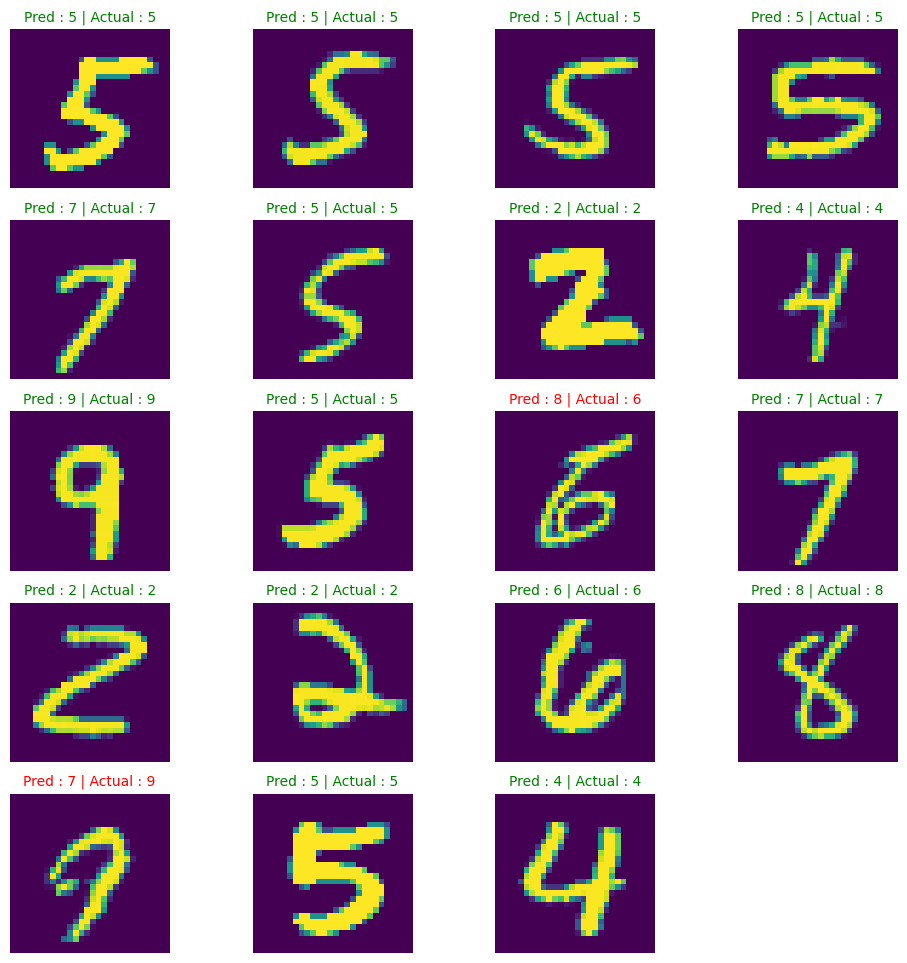

In [ ]:
fig = plt.figure(figsize=(12, 12))
rows, cols = 5, 4

for i in range(1, rows * cols) :
  fig.add_subplot(rows, cols, i)
  plt.imshow(tf.squeeze(samples[i][0], axis=0))
  plt.axis(False)
  pred_label = pred_classes[i][0]
  actual_label = samples[i][1]
  title = f"Pred : {pred_label} | Actual : {actual_label}"
  if pred_label == actual_label :
    plt.title(title, fontsize=10, c='g')
  else :
    plt.title(title, fontsize=10, c='r')